In [ ]:
!pip install -q datasets transformers librosa jiwer accelerate
!pip install -U datasets transformers accelerate evaluate


from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 192))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 200))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 200))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 200))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 716.25it/s]
Reading metadata...: 1013968it [00:21, 46307.62it/s]
Reading metadata...: 7071it [00:00, 20795.21it/s]
Reading metadata...: 540437it [00:13, 40597.06it/s]
Reading metadata...: 105it [00:00, 383.38it/s]
Reading metadata...: 16372it [00:00, 43913.77it/s]
Reading metadata...: 4961it [00:00, 9396.10it/s]
Reading metadata...: 16143it [00:00, 28513.23it/s]
Reading metadata...: 131it [00:00, 476.51it/s]
Reading metadata...: 16372it [00:00, 40958.41it/s]
Reading metadata...: 4961it [00:00, 8439.51it/s]
Reading metadata...: 16143it [00:00, 42720.33it/s]


In [ ]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-medium"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

In [ ]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)

Map:   0%|          | 0/792 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_medium_lr2",
    per_device_train_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-c9772d870225>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,7.720000
20,4.522700
30,3.586600
40,2.556600
50,2.199800
60,1.259600
70,1.294700
80,1.190000
90,1.092000
100,1.281400


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=594, training_loss=0.6910785187650409, metrics={'train_runtime': 897.4886, 'train_samples_per_second': 2.647, 'train_steps_per_second': 0.662, 'total_flos': 2.42495726026752e+18, 'train_loss': 0.6910785187650409, 'epoch': 3.0})

In [ ]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_medium_lr2"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [ ]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")

🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:02<03:47,  2.29s/it]

🔹 Predicted: 그와 동시에 예상적이란 기분은 구름과 같이 해터지고 안개처럼 쓰러졌다.
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:03<02:40,  1.63s/it]

🔹 Predicted: 하면서도 기자는 동혁이가 먹는다는 바람에 숨도 아니시고 쪽 들이탔다.
🔸 Reference: 하면서도 기천은 동혁이가 먹는다는 바람에 숨도 아니 쉬고 쪼옥 들이켰다.


  3%|▎         | 3/100 [00:04<02:32,  1.57s/it]

🔹 Predicted: 이사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사기운의 죽음의식을 회복하였다.
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  4%|▍         | 4/100 [00:06<02:21,  1.48s/it]

🔹 Predicted: 모르 텅영은 이년으로 삼짜난이 보랴갈 뱉을고 천쟁할 찐이라
🔸 Reference: 무릇 경영은 의논함으로 성취하나니 모략을 베풀고 전쟁할지니라


  5%|▌         | 5/100 [00:06<01:51,  1.17s/it]

🔹 Predicted:  아니다, 별코 아니다.
🔸 Reference: 아니다 결코 아니다.


  6%|▌         | 6/100 [00:07<01:37,  1.04s/it]

🔹 Predicted: 고맙 난 소리하지 말고 어서 가세
🔸 Reference: 공연한 소리 하지 말고 어서 가세.


  7%|▋         | 7/100 [00:08<01:33,  1.00s/it]

🔹 Predicted: 선비는 받아가지고 한난의 길을 따랐다.
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  8%|▊         | 8/100 [00:10<01:47,  1.17s/it]

🔹 Predicted:  새벽 배선보다도, 로켓 배선보다도 빠�ен 양자 배송 서비스를 오늘부터 시작합니다.
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.


  9%|▉         | 9/100 [00:10<01:36,  1.06s/it]

🔹 Predicted: 청아는 이쪽 돌을 서으면서 소리를 지른다.
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 10%|█         | 10/100 [00:12<01:43,  1.15s/it]

🔹 Predicted: 여러 사람에 앞으로 한 걸음 다가서며 그 건불근 얼굴이 매우 긴장이 진다.
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.


 11%|█         | 11/100 [00:13<01:35,  1.07s/it]

🔹 Predicted: 여전히 사건바학을 못하고 있는데도
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 12%|█▏        | 12/100 [00:14<01:30,  1.03s/it]

🔹 Predicted: 지겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.


 13%|█▎        | 13/100 [00:14<01:21,  1.07it/s]

🔹 Predicted: 이 거리를 들이사 거라요.
🔸 Reference: 이거리를 둘이서 걸어요.


 14%|█▍        | 14/100 [00:15<01:23,  1.03it/s]

🔹 Predicted: 간난이는 생긋 웃어 보이며 머리를 흔들었다.
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.


 15%|█▌        | 15/100 [00:16<01:20,  1.05it/s]

🔹 Predicted: "뭐가 무엇인지 분간할 수 없는 나는 이렇게 물었다."
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 16%|█▌        | 16/100 [00:18<01:26,  1.04s/it]

🔹 Predicted: 국무축리는 국개의 종이를 얻어 대중량이 인영한다.
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.


 17%|█▋        | 17/100 [00:19<01:29,  1.08s/it]

🔹 Predicted: 부르짖으며 발길로 벽을 걷어 차고 일어났다.
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.


 18%|█▊        | 18/100 [00:20<01:36,  1.18s/it]

🔹 Predicted: 나 오는 줄 모르고 이런 말을 하고도 가슴이 손떡하였다.
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.


 19%|█▉        | 19/100 [00:21<01:31,  1.13s/it]

🔹 Predicted: 저 뒤에 동영상으로 추한룡사건 개과 나일 겁니다.
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.


 20%|██        | 20/100 [00:23<01:35,  1.19s/it]

🔹 Predicted: 기으른 자는 말하기를 사자가 밖에 있으면 즉, 내가 나가면 거리에서 찍히겠다 하는이라
🔸 Reference: 게으른 자는 말하기를 사자가 밖에 있은즉 내가 나가면 거리에서 찢기겠다 하느니라


 21%|██        | 21/100 [00:23<01:22,  1.04s/it]

🔹 Predicted: 그럼 내일 오랍수니까."
🔸 Reference: 그럼, 내일 오랍쇼니까?


 22%|██▏       | 22/100 [00:24<01:26,  1.10s/it]

🔹 Predicted: 그는 다를 미쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 23%|██▎       | 23/100 [00:26<01:25,  1.11s/it]

🔹 Predicted: 그리고 이 집에서 옥점이를 어떻게 치요하는 것을 잠시 간이라도 알 수가 있다.
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.


 24%|██▍       | 24/100 [00:27<01:28,  1.17s/it]

🔹 Predicted: 아까까지 영신은 그 불을 얕은 하늘에 별들이 반짝이는 길로만 알고 있었다.
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:28<01:25,  1.13s/it]

🔹 Predicted: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 26%|██▌       | 26/100 [00:30<01:42,  1.38s/it]

🔹 Predicted: 고일김에 그저 이놈의 산인님하고 됐더래다 백곤고 눈이 호양으로 되폈다다 꼭꼭 참고받았다.
🔸 Reference: 골김에 그저 이놈의 장인님, 하고 댓돌에다 메꼰코 우리 고향으로 내뺄까 하다가 꾹꾹 참고 말았다.


 27%|██▋       | 27/100 [00:30<01:22,  1.14s/it]

🔹 Predicted: 여보게 김참지
🔸 Reference: 여보게 김첨지


 28%|██▊       | 28/100 [00:31<01:18,  1.09s/it]

🔹 Predicted: 갑자기 튀어져 나오는 광포, 거기 연한 개미 흥소.
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소


 29%|██▉       | 29/100 [00:32<01:16,  1.07s/it]

🔹 Predicted: 뜨거운 볏이 그의 상신을 화끈하게 하였다.
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.


 30%|███       | 30/100 [00:34<01:23,  1.19s/it]

🔹 Predicted: 어디서 된 자로 슬기롭게 하며, 잘못 나에게 지식과 그치만을 주기 위한 것이니.
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니


 31%|███       | 31/100 [00:36<01:37,  1.41s/it]

🔹 Predicted: 그의 여학생인지 만지가 한참은 매우 대팔을 빼며 입술을 곱하 눈채 김천지를 거질도 보지도 않았다.
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.


 32%|███▏      | 32/100 [00:38<01:43,  1.53s/it]

🔹 Predicted: 현나비 랭그리도 도몁은 고투친 소리를 두박두박 내며 건너 밖으로 나가버렸다.
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.


 33%|███▎      | 33/100 [00:38<01:26,  1.30s/it]

🔹 Predicted:  스스로가 형편 없다고 생각하지 말라.
🔸 Reference: 스스로가 형편없다고 생각하지 말라.


 34%|███▍      | 34/100 [00:40<01:23,  1.26s/it]

🔹 Predicted: 過去もそれが来たんですよ、たまに加われてるからなよとこ行った。
🔸 Reference: 하고 무엇을 알아챘다는 듯이 가만히 창하의 계속하는 말만 듣고 있다.


 35%|███▌      | 35/100 [00:41<01:21,  1.25s/it]

🔹 Predicted: 고려와 이미다른 그 정신의 모습을 보며 대도모들이 신랑하게 됐다.
🔸 Reference: 권력을 휘두르는 그 정치인의 모습을 보며 대중들이 실망을 느꼈다.


 36%|███▌      | 36/100 [00:42<01:14,  1.17s/it]

🔹 Predicted: 小鳥実家城市田におそろそらの本があった
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.


 37%|███▋      | 37/100 [00:43<01:14,  1.19s/it]

🔹 Predicted: 그렇게 해룽을 쳐다하는 사람은 인영의 음악평가 케잌이었다.
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.


 38%|███▊      | 38/100 [00:44<01:07,  1.09s/it]

🔹 Predicted: 모대 앞에서는 모두가 긴장하기만은 야근
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.


 39%|███▉      | 39/100 [00:45<00:59,  1.02it/s]

🔹 Predicted:  따라서 물 먹고 싶은 생각이 버짝 들었다.
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.


 40%|████      | 40/100 [00:46<00:57,  1.04it/s]

🔹 Predicted: 乙담승냥의 언제나이이 그였습니다.
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.


 41%|████      | 41/100 [00:46<00:55,  1.07it/s]

🔹 Predicted: 미리 나모를 낙하오는 즐거운 날이
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에


 42%|████▏     | 42/100 [00:48<00:58,  1.00s/it]

🔹 Predicted: さらにでも、あちを入れに、今、ネットがなりにいら
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라


 43%|████▎     | 43/100 [00:49<00:56,  1.01it/s]

🔹 Predicted: 밝은 당에 무리같은 일평 한숨 일세
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세


 44%|████▍     | 44/100 [00:49<00:47,  1.17it/s]

🔹 Predicted: Meganopa.
🔸 Reference: 네가 나빠


 45%|████▌     | 45/100 [00:51<00:57,  1.04s/it]

🔹 Predicted: 간난이는 여공이 들어가던 말까지 하여다가 우름만을 좀 더 기다려 소리 들이려 하였다.
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.


 46%|████▌     | 46/100 [00:51<00:54,  1.01s/it]

🔹 Predicted: 만일 제가 그대로 단절의 순불을 치고 가보게이
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [00:53<00:57,  1.09s/it]

🔹 Predicted: 감동으로 개화품을 흘려 대면 그 대 20장 발그네 문제되는 것이다.
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 48%|████▊     | 48/100 [00:54<01:02,  1.19s/it]

🔹 Predicted: 기사는 나타나기를 들골팔하는 무심 비슷한 생각에 잠겨 보기도 또한 흰편사입니다.
🔸 Reference: 기적이 나타나기를 빌고 바라는 미신 비슷한 생각에 잠겨 보기도 또한 이번이 처음이다.


 49%|████▉     | 49/100 [00:55<00:59,  1.17s/it]

🔹 Predicted: 비가 제법 척나 때처럼 주룩주룩 여다지고 시작한다.
🔸 Reference: 비가 제법 장마 때처럼 주룩주룩 쏟아지기 시작한다.


 50%|█████     | 50/100 [00:57<01:04,  1.28s/it]

🔹 Predicted: 문에 자르러 오신 근처 들은 여수의 제생만이 기부되게 눈치와 희복 시오겼다.
🔸 Reference: 이래저래 영신은 근처 동리의 소위 재산가 계급에게는 인심을 몹시 잃었다.


 51%|█████     | 51/100 [00:59<01:08,  1.41s/it]

🔹 Predicted: 영신은 가슴속으로 붙어치우려는 우르른을 참리라고 윗자국이 가든 손가락을 들는다.
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.


 52%|█████▏    | 52/100 [01:00<01:12,  1.50s/it]

🔹 Predicted: 따라사는 육과연소 소원을 번잡한 동식을 향하여 달려오던 선비를 눈앞에 그려 보았다.
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.


 53%|█████▎    | 53/100 [01:01<01:05,  1.38s/it]

🔹 Predicted: 그자저러한 목도 각자 간장하지 못해서 쓰는 것이 아무것도 아시다.
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.


 54%|█████▍    | 54/100 [01:02<00:57,  1.25s/it]

🔹 Predicted: 그만 그 남신 말을 내게 치모를 내가 노곤물이다.
🔸 Reference: 그가 그 나무 실과를 내게 주므로 내가 먹었나이다


 55%|█████▌    | 55/100 [01:04<00:57,  1.28s/it]

🔹 Predicted: 니가 니 아네 왕을 듣골 배가 누그러 먹지 말라한다 무실과를 먹었는지
🔸 Reference: 네가 네 아내의 말을 듣고 내가 너더러 먹지 말라한 나무 실과를 먹었은즉


 56%|█████▌    | 56/100 [01:05<00:53,  1.23s/it]

🔹 Predicted: 병자의 몸은 벌써 사느라게 식었으며 얼굴을 파난 길이었다.
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.


 57%|█████▋    | 57/100 [01:06<00:50,  1.18s/it]

🔹 Predicted: 그러나 예수 안일케는 운장에서 찾을 거라 내 오지 셔요."
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.


 58%|█████▊    | 58/100 [01:07<00:43,  1.03s/it]

🔹 Predicted: 춘아의 바랄 그의 간호는
🔸 Reference: 지금 바로 입금 가능해?


 59%|█████▉    | 59/100 [01:07<00:39,  1.03it/s]

🔹 Predicted: 이리야여 좋아져서 단전은 끝이 갔습니다.
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.


 60%|██████    | 60/100 [01:08<00:36,  1.09it/s]

🔹 Predicted: 그나로 당신이를 다시 종월하여 여행었다.
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.


 61%|██████    | 61/100 [01:09<00:39,  1.01s/it]

🔹 Predicted: 선비는 간도히 그를 품에 달취하고 알담해 갔으며 두고 말였다.
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가슴이 두근거렸다.


 62%|██████▏   | 62/100 [01:11<00:40,  1.07s/it]

🔹 Predicted: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 덤이었던 것이다.
🔸 Reference: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 더 미웠던 것이다.


 63%|██████▎   | 63/100 [01:12<00:41,  1.13s/it]

🔹 Predicted: 그대는 그 끼 없는 선비를 보며 감동에게서 단단한 나무감을 들린 듯하였다.
🔸 Reference: 그들은 풀기 없는 선비를 보며 감독에게서 단단한 나무람을 들은 듯하였다.


 64%|██████▍   | 64/100 [01:13<00:36,  1.01s/it]

🔹 Predicted: 찌그온 날은 고구마일 것이다.
🔸 Reference: 즐거운 날은 오고 말 것이다.


 65%|██████▌   | 65/100 [01:14<00:35,  1.02s/it]

🔹 Predicted: 만저 말씀하여 들 것은 섭섭히 생각하시지 말으십시요.
🔸 Reference: 먼저 말씀하여 둘 것은 섭섭히 생각하시지 말으십시오.


 66%|██████▌   | 66/100 [01:15<00:34,  1.00s/it]

🔹 Predicted:  보기명으로 투표를 하는데도 대필로 쓴 사람이 많았다.
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.


 67%|██████▋   | 67/100 [01:16<00:34,  1.04s/it]

🔹 Predicted: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.


 68%|██████▊   | 68/100 [01:17<00:32,  1.01s/it]

🔹 Predicted:  배고픈데 지금 저녁식사를 먹으면 너무 이랄까?
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 69%|██████▉   | 69/100 [01:18<00:31,  1.02s/it]

🔹 Predicted: 그는 기침을 안 하려고 입을 꼭 담은 후에 숨을 쉬지 않았다.
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.


 70%|███████   | 70/100 [01:19<00:34,  1.13s/it]

🔹 Predicted: 동혁은 입술을 꽉 깨물고 원재의 티를 따라 묵묵히 눈틀 바틀을 걸었다.
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.


 71%|███████   | 71/100 [01:20<00:29,  1.01s/it]

🔹 Predicted: 대한 사람 대한으로 길이 보전하세
🔸 Reference: 대한 사람 대한으로 길이 보전하세


 72%|███████▏  | 72/100 [01:21<00:31,  1.13s/it]

🔹 Predicted: 여러 해 별로 오던 동무회의 회관을 치려고 오늘 저녁에 그 지경을 땀는 것이다.
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.


 73%|███████▎  | 73/100 [01:22<00:28,  1.07s/it]

🔹 Predicted: 이웃에게 정하는 것은 그의 배 앞에 금모를 치는 것이라
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라


 74%|███████▍  | 74/100 [01:23<00:28,  1.10s/it]

🔹 Predicted: 하단이 밀리부터 허리를 고툴리며 즉석으로 기어 들어갑니다.
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.


 75%|███████▌  | 75/100 [01:24<00:25,  1.02s/it]

🔹 Predicted:  그와 동시에 기천의 가슴도 큰 하고 올렸다.
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 76%|███████▌  | 76/100 [01:25<00:24,  1.04s/it]

🔹 Predicted: 춘우는 모래 위에 앉아서 멀리 서울 쪽을 바라보고 앉아 있었다.
🔸 Reference: 춘우는 모래 위에 앉아서 멀리 서울 쪽을 바라보고 앉아 있었다.


 77%|███████▋  | 77/100 [01:26<00:25,  1.09s/it]

🔹 Predicted: 그리고 수업는 컸으며 대신아 서로 경쟁을 하며 태여고 태여간다.
🔸 Reference: 그리고 수없는 버스며 택시가 서로 경쟁을 하며 달려오고 달려간다.


 78%|███████▊  | 78/100 [01:27<00:22,  1.01s/it]

🔹 Predicted: 그는 그와 한 그끝에 있는 인무였다.
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 79%|███████▉  | 79/100 [01:28<00:22,  1.06s/it]

🔹 Predicted: 이서방은 부끄러니 이것을 패어보며 가슴이 후련해졌다.
🔸 Reference: 이서방은 물끄러미 이것을 바라보며 가슴이 후련해졌다.


 80%|████████  | 80/100 [01:29<00:18,  1.10it/s]

🔹 Predicted: 제가 지금 좀 너무 급해서요.
🔸 Reference: 제가 지금 좀 너무 급해서요.


 81%|████████  | 81/100 [01:30<00:16,  1.14it/s]

🔹 Predicted: 유명한 광영 소나타의 착가 말씀이지요.
🔸 Reference: 유명한 광염 소나타의 작가 말씀이지요?"


 82%|████████▏ | 82/100 [01:31<00:16,  1.12it/s]

🔹 Predicted: 취업 터져서 경험이 내는 건 못 찾는다.
🔸 Reference: 쥐어 터져서 병원비 내는 건 못 참는다


 83%|████████▎ | 83/100 [01:32<00:15,  1.12it/s]

🔹 Predicted: 영호와 하나님이 에든 동산에서 그 사람을 내어 보네요.
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 84%|████████▍ | 84/100 [01:33<00:14,  1.08it/s]

🔹 Predicted: 정원대 씨와 마동혁 씨의 음악을 굉장히 편하다고 생각했거든요.
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.


 85%|████████▌ | 85/100 [01:34<00:15,  1.05s/it]

🔹 Predicted: 그때 비가 내준 듯한 그 전의 조소가 들이는 듯하여 그는 얼핏 머리를 시겼다.
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [01:35<00:15,  1.10s/it]

🔹 Predicted: 왠일인지 선기가 울면 할메는 건번이 따라 온곤 하였던 것이다.
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 87%|████████▋ | 87/100 [01:36<00:15,  1.15s/it]

🔹 Predicted: 여기 편의점은 24시간 내내 열툼에 안하니까 필요한 게 있으면 미리 사 드세요.
🔸 Reference: 여기 편의점은 이십사시간 내내 열지는 않으니까, 필요한 게 있으면 미리 사두세요.


 88%|████████▊ | 88/100 [01:38<00:13,  1.16s/it]

🔹 Predicted: 하고 창하는 춘우의 얼굴을 한참이나 물그러미 들여다보았다.
🔸 Reference: 하고 창하는 춘우의 얼굴을 한참이나 물끄러미 들여다보았다.


 89%|████████▉ | 89/100 [01:38<00:11,  1.06s/it]

🔹 Predicted: 여 동생이 정장 어머니를 닮았나 보다.
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 90%|█████████ | 90/100 [01:40<00:10,  1.10s/it]

🔹 Predicted:  황금정에서는 영산으로 가는 듯한 월급쟁이들이 가득 들이 볼리었다.
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.


 91%|█████████ | 91/100 [01:41<00:09,  1.08s/it]

🔹 Predicted: 이것이 이 좋은 새 옷을 춘 대 대안 흥선의 인사였다.
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 92%|█████████▏| 92/100 [01:42<00:08,  1.05s/it]

🔹 Predicted: 보라 이 사람이 선앙을 하는 일에 우리 중 하나가 체계였으니
🔸 Reference: 보라 이 사람이 선악을 아는 일에 우리 중 하나 같이 되었으니


 93%|█████████▎| 93/100 [01:42<00:06,  1.07it/s]

🔹 Predicted: 자, 여기 어떤 상점이 있답시다.
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [01:43<00:05,  1.02it/s]

🔹 Predicted: 그때 그는 경찰서에서 곰 같던 생각을 하고 소름이 쭉 기쳤다.
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 95%|█████████▌| 95/100 [01:45<00:05,  1.03s/it]

🔹 Predicted: 일포는 못들 채고 있다가 자전이 또 우변에서 맡아 보곤 하였다.
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.


 96%|█████████▌| 96/100 [01:46<00:04,  1.08s/it]

🔹 Predicted: 자기의 마음을 자기 아니 아는 자는 성옥이 무너지고 성격이 없는 것 같은이라
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라


 97%|█████████▋| 97/100 [01:47<00:03,  1.06s/it]

🔹 Predicted: 그의 가슴에는 또다시 그 실묵치가 옥스러 올라온다.
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.


 98%|█████████▊| 98/100 [01:47<00:01,  1.14it/s]

🔹 Predicted: 暗いこした
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [01:48<00:00,  1.02it/s]

🔹 Predicted: 경난이가 몸을 숙그려고 움칠하는 바람에 선비가 푹 확 걸어졌다.
🔸 Reference: 간난이가 몸을 솟구려고 움찔하는 바람에 선비가 푹 거꾸러졌다.


100%|██████████| 100/100 [01:49<00:00,  1.10s/it]

🔹 Predicted: 김도가 섞여 살건이와 모를 그들을 채신이는 여호와 신이라
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 0.5352
🌍 Language: en



  1%|          | 1/100 [00:01<03:00,  1.82s/it]

🔹 Predicted: Agaimno, mali, hlapovi kravice lahko opetakaj in zauvrši mažerna vladec.
🔸 Reference: Again, small fast craft could attack and destroy a major warship.


  2%|▏         | 2/100 [00:03<02:27,  1.51s/it]

🔹 Predicted: Bezpec se skoletil in sezoletil korenj je odrežil by Michael Rothenberg.
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.


  3%|▎         | 3/100 [00:04<02:08,  1.33s/it]

🔹 Predicted: Odliženci oblagali na večeru zela v starih stara.
🔸 Reference: The residents moved to higher ground east of the original site.


  4%|▍         | 4/100 [00:04<01:39,  1.04s/it]

🔹 Predicted: We need an end of all such matter.
🔸 Reference: We need an end of all such matter.


  5%|▌         | 5/100 [00:05<01:24,  1.12it/s]

🔹 Predicted: Bridgeit was born and raised in Ghana.
🔸 Reference: Bridget was born and raised in Ghana.


  6%|▌         | 6/100 [00:06<01:24,  1.11it/s]

🔹 Predicted: The Crash is the dailyest aviation disaster in both Basque Country and Abere history.
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.


  7%|▋         | 7/100 [00:06<01:14,  1.25it/s]

🔹 Predicted: The pitch roof is layered in rear tiles.
🔸 Reference: The pitched roof is clad in red tiles.


  8%|▊         | 8/100 [00:08<01:31,  1.01it/s]

🔹 Predicted: Ski gaproad leži sestvih vsega v vladeh S. Poplara in Tupveisberg.
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.


  9%|▉         | 9/100 [00:09<01:30,  1.00it/s]

🔹 Predicted: Egyptanje arkeologija je ena z obrečev Egyptologije.
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.


 10%|█         | 10/100 [00:10<01:31,  1.01s/it]

🔹 Predicted: Idej se zelo znamen as "Baeo-Kerin-Welt".
🔸 Reference: It is also known as Bayo Canyon Road.


 11%|█         | 11/100 [00:12<01:54,  1.28s/it]

🔹 Predicted: Odrej sebovih razvijavljenja vsega občutno vzahoviljijo Šavalli vrbe in Vakoladu na stresu.
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".


 12%|█▏        | 12/100 [00:13<01:57,  1.33s/it]

🔹 Predicted: Bolih na nekaj bolih uspobajali naši vrstne obdobi in na vsega servicu.
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.


 13%|█▎        | 13/100 [00:15<01:54,  1.32s/it]

🔹 Predicted: Odrej se obkazavajo kakšenjami in geometrijni obkazavaci.
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.


 14%|█▍        | 14/100 [00:15<01:43,  1.20s/it]

🔹 Predicted: Oj, želim, da slibim nekaj dloužje.
🔸 Reference: I wanted to sleep a little longer, he thought.


 15%|█▌        | 15/100 [00:17<01:40,  1.18s/it]

🔹 Predicted: Oplivitaj programi se naoči v velikih način učinjov.
🔸 Reference: The people with programs are seated in a very large, elegant room.


 16%|█▌        | 16/100 [00:18<01:33,  1.11s/it]

🔹 Predicted: A manj je zaživljavati v svojim obrani.
🔸 Reference: A man is grilling out in his backyard.


 17%|█▋        | 17/100 [00:18<01:28,  1.06s/it]

🔹 Predicted: A large black dog is catching a frisky while the large brown dog follows shortly after.
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.


 18%|█▊        | 18/100 [00:20<01:29,  1.10s/it]

🔹 Predicted: Avtibjerajski misijenje so se njegovno zanemaljali.
🔸 Reference: Arctic rescue missions were mounted as necessary.


 19%|█▉        | 19/100 [00:21<01:24,  1.05s/it]

🔹 Predicted: Kartoffse reži sem plebe v odindentem decisji.
🔸 Reference: Carter said racism played a part in the decision.


 20%|██        | 20/100 [00:21<01:15,  1.06it/s]

🔹 Predicted: Its more order is the typical subject-object order.
🔸 Reference: Its word order is the typical subject-object-verb.


 21%|██        | 21/100 [00:37<07:00,  5.32s/it]

🔹 Predicted: Wanke menc bo vzadil, to je stolj prilagajljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivljivl
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.


 22%|██▏       | 22/100 [00:38<05:16,  4.06s/it]

🔹 Predicted: Dobrej, še diklaj, na tol' še malo morda.
🔸 Reference: To which he replies: I thought she was your mother!


 23%|██▎       | 23/100 [00:39<03:52,  3.02s/it]

🔹 Predicted: Later that night Jimmy took over by human.
🔸 Reference: Later that night Jill is kidnapped by gill men.


 24%|██▍       | 24/100 [00:39<02:54,  2.30s/it]

🔹 Predicted: Empty Borets make the most noise.
🔸 Reference: Empty barrels make the most noise.


 25%|██▌       | 25/100 [00:55<07:50,  6.28s/it]

🔹 Predicted: Kanji in koruženja se opet vrstili, je bilo vse zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo

 26%|██▌       | 26/100 [00:56<05:58,  4.84s/it]

🔹 Predicted: Bample. Gde je našem vampelstvom stavu je našem vrst, je našem vrst.
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 27%|██▋       | 27/100 [00:57<04:33,  3.75s/it]

🔹 Predicted: The term "Odango" in "Odaban" is still referred to a gaining variety of bumpers style.
🔸 Reference: The term "odango" in Japanese can refer to any variety of bun hairstyle.


 28%|██▊       | 28/100 [00:58<03:24,  2.83s/it]

🔹 Predicted: The American Theatre Hall of Fame is located in the lobby.
🔸 Reference: The American Theatre Hall of Fame is located in the lobby.


 29%|██▉       | 29/100 [00:59<02:32,  2.15s/it]

🔹 Predicted: I've always wanted to do this.
🔸 Reference: I've always wanted to do this!


 30%|███       | 30/100 [01:00<02:02,  1.75s/it]

🔹 Predicted: Hrkopanin je kancelor-evalut.
🔸 Reference: Her opponent is Councilor Irwin Tieng.


 31%|███       | 31/100 [01:00<01:44,  1.51s/it]

🔹 Predicted: A work of this child might go beyond the larger and less larger micro-lapam.
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.


 32%|███▏      | 32/100 [01:02<01:36,  1.41s/it]

🔹 Predicted: Ie v stiži Bresašče je kaj spoljiv in obdobil.
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.


 33%|███▎      | 33/100 [01:02<01:23,  1.25s/it]

🔹 Predicted: Lalis desnest bi strenzal, as bi v pos.
🔸 Reference: English dismissed these claims as being false.


 34%|███▍      | 34/100 [01:04<01:28,  1.34s/it]

🔹 Predicted: Ekranjstvist Westpac in Ljubitr, kje je člapnice izreženja zbogatelja.
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 35%|███▌      | 35/100 [01:20<06:04,  5.61s/it]

🔹 Predicted: Odegevse je bilo zrečeno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno začetno
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roo

 36%|███▌      | 36/100 [01:20<04:23,  4.12s/it]

🔹 Predicted: A moret is the counterpart to a guest.
🔸 Reference: A mold is the counterpart to a cast.


 37%|███▋      | 37/100 [01:21<03:12,  3.06s/it]

🔹 Predicted: 兵庁村寺中田
🔸 Reference: He also enjoys judo.


 38%|███▊      | 38/100 [01:22<02:32,  2.46s/it]

🔹 Predicted: Vsih pridružov je odkazan vseh pridružov.
🔸 Reference: All artillery units wear the "Gun Sight" on their helmets.


 39%|███▉      | 39/100 [01:23<01:57,  1.93s/it]

🔹 Predicted: I would not recommend publishing the article without the data set.
🔸 Reference: I would not recommend publishing the article without the dataset.


 40%|████      | 40/100 [01:23<01:32,  1.54s/it]

🔹 Predicted: Wat de valli hejl?
🔸 Reference: What's the idea here?


 41%|████      | 41/100 [01:24<01:12,  1.22s/it]

🔹 Predicted: You got plenty of money.
🔸 Reference: You got plenty of money?


 42%|████▏     | 42/100 [01:25<01:04,  1.11s/it]

🔹 Predicted: Toraj je nekaj začetka začetka.
🔸 Reference: There is no fighting against fate


 43%|████▎     | 43/100 [01:25<00:53,  1.07it/s]

🔹 Predicted: Nothing is the matter with me.
🔸 Reference: Nothing's the matter with me.


 44%|████▍     | 44/100 [01:27<01:00,  1.09s/it]

🔹 Predicted: Nagar aspoz v sumbeno je Reza Huljš jasno nekaj vzbeno situacijo dvam.
🔸 Reference: Not that I was listening, but I noticed that you sounded really stressed when you were explaining the situation to him.


 45%|████▌     | 45/100 [01:27<00:51,  1.07it/s]

🔹 Predicted: A land is as human as us fish.
🔸 Reference: I want it as soon as possible.


 46%|████▌     | 46/100 [01:29<01:04,  1.20s/it]

🔹 Predicted: Ve se lahko potrebovati na kvalitivno vladec od anisotropičnega filtra začehajati nekaj skupin.
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.


 47%|████▋     | 47/100 [01:30<01:08,  1.29s/it]

🔹 Predicted: Dassidini je sposvedljali nobov na svojej dioziji, do ena kultu in monastriji.
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.


 48%|████▊     | 48/100 [01:31<00:58,  1.12s/it]

🔹 Predicted: Gudarden Dahlia claims to have miscarried.
🔸 Reference: To that end, Talia claims to have miscarried.


 49%|████▉     | 49/100 [01:32<00:59,  1.16s/it]

🔹 Predicted: In musiciae, the condition is called Musiciae's Vocal Dystonia or simply Musiciae's Dystonia.
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".


 50%|█████     | 50/100 [01:34<00:57,  1.16s/it]

🔹 Predicted: Hljubo se je spomal, da vse je svoje objevljivo.
🔸 Reference: He said that everything has its own destiny.


 51%|█████     | 51/100 [01:35<01:03,  1.30s/it]

🔹 Predicted: Kanje, ko je videl sezolik in kakšenje, se je odličil, obkazal in obkazal na elementale.
🔸 Reference: Whenever he saw the sea, or a fire, he fell silent, impressed by their elemental force.


 52%|█████▏    | 52/100 [01:36<00:56,  1.17s/it]

🔹 Predicted: I later went on to school team more centuries again to set up as a college.
🔸 Reference: He later went on to score two more centuries against the South Africans.


 53%|█████▎    | 53/100 [01:37<00:52,  1.12s/it]

🔹 Predicted: Chassier Soets evoke for alier similar forms, such as Pistolsoes.
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.


 54%|█████▍    | 54/100 [01:39<00:56,  1.23s/it]

🔹 Predicted: Havrej, sečen reaktor je zelo začehajivati svoje semplične stavljave.
🔸 Reference: However, certain reactants do not follow this simple pattern.


 55%|█████▌    | 55/100 [01:39<00:45,  1.02s/it]

🔹 Predicted: The tournament features four 18 regions.
🔸 Reference: The tournament features four eight-team regions.


 56%|█████▌    | 56/100 [01:55<03:55,  5.36s/it]

🔹 Predicted: Sholter Campbell je zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapevno zapev
🔸 Reference: Sholto Campbell, succeeded by younger brothers still, Barrington and Archiba

 57%|█████▋    | 57/100 [01:56<03:03,  4.26s/it]

🔹 Predicted: Odvih stvari se skupaj vzadil na istorih Vireništva, Marthelm in Dorda.
🔸 Reference: The story focuses on the history of the villainous wizard Marten Broadcloak.


 58%|█████▊    | 58/100 [01:57<02:15,  3.23s/it]

🔹 Predicted: Mosby moste vrode vsoj United Press International.
🔸 Reference: Mosby mostly wrote for United Press International.


 59%|█████▉    | 59/100 [01:58<01:38,  2.40s/it]

🔹 Predicted: The facilities are very big.
🔸 Reference: The facilities are very basic.


 60%|██████    | 60/100 [01:58<01:16,  1.90s/it]

🔹 Predicted: The Federal Electoral District elect the Federal Chamber of Deputies.
🔸 Reference: The Federal Electoral Districts elect the federal Chamber of Deputies.


 61%|██████    | 61/100 [01:59<01:02,  1.60s/it]

🔹 Predicted: Eitem Tau was taken to customize much, mostly because of my limited German.
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.


 62%|██████▏   | 62/100 [02:00<00:51,  1.36s/it]

🔹 Predicted: Aklas Cinema hosted selected films during the annual International Istanbul Film Festival.
🔸 Reference: Atlas Cinema hosted selected films during the annual International Istanbul Film Festival.


 63%|██████▎   | 63/100 [02:01<00:50,  1.37s/it]

🔹 Predicted: Odvih obkazov je vsega vsega vsega v politično in historično scenarijo.
🔸 Reference: The book covers several issues in the political and historical scenarios of Nepal.


 64%|██████▍   | 64/100 [02:02<00:41,  1.16s/it]

🔹 Predicted: Aging and memory are key preoccupations of this novel.
🔸 Reference: Ageing and memory are key preoccupations of this novel.


 65%|██████▌   | 65/100 [02:18<03:11,  5.46s/it]

🔹 Predicted: Dolih je je pravzakaj zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo 

 66%|██████▌   | 66/100 [02:18<02:18,  4.09s/it]

🔹 Predicted: What guides it lands would help in be a link to her Forbidden House.
🔸 Reference: What guidelines will help in building cheaper, affordable houses?


 67%|██████▋   | 67/100 [02:19<01:40,  3.05s/it]

🔹 Predicted: Nialli der, the coin repeated.
🔸 Reference: ‘Nearly there!’ the Queen repeated.


 68%|██████▊   | 68/100 [02:20<01:13,  2.30s/it]

🔹 Predicted: A couple knew that some art worked.
🔸 Reference: A couple look at some artwork


 69%|██████▉   | 69/100 [02:21<01:03,  2.06s/it]

🔹 Predicted: Fillip je stali na lopi, vidjati vavljave, odstavljati roke in spusti spu.
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.


 70%|███████   | 70/100 [02:23<00:57,  1.91s/it]

🔹 Predicted: Ejšov naslabj, kakšenjev in kakšenjev, kakšenjev in kakšenjev.
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole


 71%|███████   | 71/100 [02:38<02:51,  5.91s/it]

🔹 Predicted: Odvih na vrstu je bilo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo

 72%|███████▏  | 72/100 [02:40<02:10,  4.66s/it]

🔹 Predicted: Az jih je odvršenje, zvukov in zvonov, zelo stranke vržave in obdobno uvršenje.
🔸 Reference: The years of research, the magic symbols, the strange words and the laboratory equipment...


 73%|███████▎  | 73/100 [02:41<01:37,  3.59s/it]

🔹 Predicted: Many džilkev obdobjavali se na obdobjavljeni.
🔸 Reference: Many children walk together on a dirt path.


 74%|███████▍  | 74/100 [02:42<01:17,  2.99s/it]

🔹 Predicted: Dvide ljudi spoljavajo valline in gitaro v strih, da se podobajenja svojej baze.
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.


 75%|███████▌  | 75/100 [02:44<01:03,  2.53s/it]

🔹 Predicted: Ej jantarski boj in velik obdobj se do nekateri v velikih obdobjih opetov.
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.


 76%|███████▌  | 76/100 [02:44<00:46,  1.96s/it]

🔹 Predicted: A student may work independently or collaborate with others.
🔸 Reference: The student may work independently or collaborate with others.


 77%|███████▋  | 77/100 [02:46<00:40,  1.76s/it]

🔹 Predicted: Zemeljel se dokončit svoje gradacije, se svojev skupaj vremeni.
🔸 Reference: He went on to complete his graduation while serving in the Indian Army.


 78%|███████▊  | 78/100 [02:46<00:31,  1.44s/it]

🔹 Predicted: The group was under the leadership of Michael Coynes.
🔸 Reference: The group was under the leadership of Michael Collins.


 79%|███████▉  | 79/100 [02:47<00:26,  1.25s/it]

🔹 Predicted: The great luck in the address of the browser does not really interest us.
🔸 Reference: The green lock in the address bar of your browser does NOT mean you can trust the site.


 80%|████████  | 80/100 [02:48<00:20,  1.05s/it]

🔹 Predicted: Wall-Earstim Champion.
🔸 Reference: While you're still champion!


 81%|████████  | 81/100 [02:49<00:20,  1.08s/it]

🔹 Predicted: Ešte just read the code, you'll miss out on why I made certain decisions in the post-apost.
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.


 82%|████████▏ | 82/100 [02:50<00:20,  1.13s/it]

🔹 Predicted: FireFox je izsezajša začetka, ali mi je prezentirajša Chrome.
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.


 83%|████████▎ | 83/100 [02:52<00:20,  1.20s/it]

🔹 Predicted: Ale iti vsef je svoj, da bi se način začel uvrstiti v občasih.
🔸 Reference: Thought there might be one left over.


 84%|████████▍ | 84/100 [02:52<00:17,  1.12s/it]

🔹 Predicted: Miljard ask his friend Mark Salomey to grow up as vocalist.
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.


 85%|████████▌ | 85/100 [02:53<00:15,  1.03s/it]

🔹 Predicted: Adelante Custy studies the Atlantic World in the early modern period.
🔸 Reference: Atlantic history studies the Atlantic World in the early modern period.


 86%|████████▌ | 86/100 [02:54<00:13,  1.00it/s]

🔹 Predicted: In France it is also used within the "neighborhood of the partition order".
🔸 Reference: In France, it is also used within the male branch of the Carthusian Order.


 87%|████████▋ | 87/100 [02:55<00:12,  1.07it/s]

🔹 Predicted: Selj je obrezen na Dajunfrafu.
🔸 Reference: She was buried at the in Frankfurt.


 88%|████████▊ | 88/100 [02:56<00:11,  1.04it/s]

🔹 Predicted: Zabrejte se ministrem za javne spolice v kabinevih.
🔸 Reference: She became the Minister for Youth and Sports in the Bhattarai cabinet.


 89%|████████▉ | 89/100 [02:57<00:12,  1.10s/it]

🔹 Predicted: Vsevam ali osebem stammem in dvim stammenom je opravljeno v oba stavu.
🔸 Reference: There are seven or eight stamens and two staminodes arranged around the two carpels.


 90%|█████████ | 90/100 [02:58<00:09,  1.02it/s]

🔹 Predicted: I could die happily, and that made me feel good.
🔸 Reference: I could die happily, and that made me feel good.


 91%|█████████ | 91/100 [03:00<00:09,  1.09s/it]

🔹 Predicted: A jazda s glasbenim hodit'a je babi, ki je izgleda na njegovu.
🔸 Reference: A lady with glasses holds a baby who is looking up at her.


 92%|█████████▏| 92/100 [03:01<00:08,  1.12s/it]

🔹 Predicted: Odvaj se na taj kljubovače je odvajavati do subrej.
🔸 Reference: A person in dark clothes is walking down to the subway.


 93%|█████████▎| 93/100 [03:01<00:06,  1.00it/s]

🔹 Predicted: A small child wearing a white hat reaches for the paintbrush.
🔸 Reference: A small child wearing a white hat reaches for a paintbrush.


 94%|█████████▍| 94/100 [03:02<00:05,  1.09it/s]

🔹 Predicted: Splitnolab with a great sharp lobe.
🔸 Reference: Split the log with a quick, sharp blow.


 95%|█████████▌| 95/100 [03:03<00:04,  1.18it/s]

🔹 Predicted: As we know, understones in their brain also result.
🔸 Reference: As he looked at the stones, he felt relieved for some reason.


 96%|█████████▌| 96/100 [03:04<00:04,  1.02s/it]

🔹 Predicted: Ajlo jih vse je vse ljudi, ki jih ne bojo všeč v njihovoj viziji.
🔸 Reference: I don't know if I'll be able to find life in the desert, the boy thought.


 97%|█████████▋| 97/100 [03:05<00:02,  1.09it/s]

🔹 Predicted: Bakudin visedljest se.
🔸 Reference: I could envisage the scene.


 98%|█████████▊| 98/100 [03:06<00:01,  1.14it/s]

🔹 Predicted: The Opera has set titles, so we could understand what was going on.
🔸 Reference: The opera had surtitles, so we could understand what was going on


 99%|█████████▉| 99/100 [03:06<00:00,  1.26it/s]

🔹 Predicted: We just die when we feel too hurt.
🔸 Reference: We perspire when we feel too hot.


100%|██████████| 100/100 [03:08<00:00,  1.88s/it]

🔹 Predicted: Molj recentno je klasično paigreži responsibli za vsega prepranje predena paigreža.
🔸 Reference: More recently, professional painters are responsible for all preparation prior to painting.
✅ EN WER: 1.5449
🌍 Language: ja



  1%|          | 1/100 [00:00<01:36,  1.03it/s]

🔹 Predicted: 風に吹かれるように離れていった
🔸 Reference: 風に吹かれるように離れていった


  2%|▏         | 2/100 [00:01<01:17,  1.27it/s]

🔹 Predicted: どんもそうだし、そうだ、きっと。
🔸 Reference: どうもそうらしい、そうだ、きっと


  3%|▎         | 3/100 [00:02<01:24,  1.15it/s]

🔹 Predicted: 公園も大地と一緒だった、何も見つからなかった
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった


  4%|▍         | 4/100 [00:03<01:21,  1.18it/s]

🔹 Predicted: ノリモンではテイルズ川の近くに住む
🔸 Reference: ロンドンではテームズ川の近くに住み、


  5%|▌         | 5/100 [00:04<01:40,  1.06s/it]

🔹 Predicted: 頭の中でアニメの映像が長いて、他のことについて何も考えることが出来ない状態。
🔸 Reference: 頭の中でアニメの映像が流れて、他のことについて何も考えることができない状態


  6%|▌         | 6/100 [00:05<01:29,  1.05it/s]

🔹 Predicted: フェルデもそういうのをよく食べます。
🔸 Reference: 冬でもそうめんをよく食べます


  7%|▋         | 7/100 [00:06<01:16,  1.21it/s]

🔹 Predicted: 三重区和奈市
🔸 Reference: 三重県桑名市


  8%|▊         | 8/100 [00:07<01:17,  1.19it/s]

🔹 Predicted: 新トレの成果が出る前に腰を痛むた
🔸 Reference: 筋トレの成果がでる前に腰を痛めた


  9%|▉         | 9/100 [00:07<01:05,  1.38it/s]

🔹 Predicted: 京都市南区
🔸 Reference: 京都市南区


 10%|█         | 10/100 [00:08<01:09,  1.29it/s]

🔹 Predicted: モンタナションは西外都市の北日本都市である
🔸 Reference: モンタナ州の最大都市はビリングスである


 11%|█         | 11/100 [00:09<01:10,  1.26it/s]

🔹 Predicted: 八役玉子は簡単に言えけると。
🔸 Reference: 厚焼きたまごはかんたんにできる


 12%|█▏        | 12/100 [00:10<01:20,  1.10it/s]

🔹 Predicted: 御庭庭とれいましなしだった遠距離半田を超えてしまった
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 13%|█▎        | 13/100 [00:12<01:41,  1.17s/it]

🔹 Predicted: ペッティースソシエイソときたいには、きょうりゃ心の上でかくとり、さっさと足も上で上ってきた。
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた


 14%|█▍        | 14/100 [00:13<01:34,  1.10s/it]

🔹 Predicted: 自己の中に一生的されの良くのに行われてください。
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください


 15%|█▌        | 15/100 [00:15<02:06,  1.49s/it]

🔹 Predicted: 捌えたものが、作れるものが、として、無所の的と、自己との一体的に、一所的に、歴史的に、世界を使う、生物の世界での援助の世界であったんです。
🔸 Reference: 作られたものから作るものへとして、矛盾的自己同一に徹することによって、歴史的世界は生物の世界から人間の世界へと発展する。


 16%|█▌        | 16/100 [00:16<01:48,  1.30s/it]

🔹 Predicted: 朝ごda出行しちゃうがちで上着が上がる
🔸 Reference: ふざけて出品したらガチで売れてビビる


 17%|█▋        | 17/100 [00:17<01:36,  1.17s/it]

🔹 Predicted: 改革部であると力を提出する体制にします。
🔸 Reference: 外国だと驚くほど安く買えたりします


 18%|█▊        | 18/100 [00:18<01:32,  1.12s/it]

🔹 Predicted: スケだったら、今、僕に、今、エクシャルだったか、
🔸 Reference: 好きだった映画がリメイクされた


 19%|█▉        | 19/100 [00:19<01:26,  1.07s/it]

🔹 Predicted: 公園の家で一設は残ると比べて変わっていた
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた


 20%|██        | 20/100 [00:20<01:20,  1.01s/it]

🔹 Predicted: きぼうは一定高福部の上に上下となか
🔸 Reference: 自分は、いったい幸福なのでしょうか


 21%|██        | 21/100 [00:21<01:32,  1.18s/it]

🔹 Predicted: シュスタの上のココは、キュキュキュ、トゥット、キュッ、キュッ、マディ、ア、
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く


 22%|██▏       | 22/100 [00:22<01:23,  1.07s/it]

🔹 Predicted: 彼は実家の墓に埋蔬された。
🔸 Reference: 彼は、実家のお墓に埋葬された。


 23%|██▎       | 23/100 [00:23<01:27,  1.14s/it]

🔹 Predicted: 木箱の向こうの大きな写真が、僕が知らない君に向けてメインする。
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。


 24%|██▍       | 24/100 [00:24<01:19,  1.05s/it]

🔹 Predicted: 料理酒を入れるとコクが出ておいしくなる。
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。


 25%|██▌       | 25/100 [00:25<01:08,  1.09it/s]

🔹 Predicted: 過去に捉えていると動けない
🔸 Reference: 過去にとらわれてると動けない


 26%|██▌       | 26/100 [00:26<01:07,  1.09it/s]

🔹 Predicted: 利用者の意見も参考にするとよいでしょ。
🔸 Reference: 利用者の意見も参考にするとよいでしょう


 27%|██▋       | 27/100 [00:27<01:07,  1.08it/s]

🔹 Predicted: リニュアルオープンというか、ほとんだ変わってなかった
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった


 28%|██▊       | 28/100 [00:27<01:01,  1.17it/s]

🔹 Predicted: ご役に立ててうれしいです。
🔸 Reference: お役に立ててうれしいです


 29%|██▉       | 29/100 [00:28<00:55,  1.29it/s]

🔹 Predicted: 岡山県上崎市
🔸 Reference: 岡山県美作市


 30%|███       | 30/100 [00:29<00:56,  1.23it/s]

🔹 Predicted: 見てないけど、感動はあるが、同じようにで安くて。
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う


 31%|███       | 31/100 [00:30<01:03,  1.08it/s]

🔹 Predicted: 技術は静寺とである、世界を革新し、また豊富にする。
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。


 32%|███▏      | 32/100 [00:31<01:05,  1.04it/s]

🔹 Predicted: 専門用具がいっぱいだけど、話してる本にもわかってない。
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 33%|███▎      | 33/100 [00:32<01:14,  1.11s/it]

🔹 Predicted: 手入れたもの、それ自身が自己の人格として自己のうちから自己を超え行くことでなければならない。
🔸 Reference: 与えられたものそれ自身が自己矛盾的として、自己の内から自己を越え行くことでなければならない。


 34%|███▍      | 34/100 [00:33<01:02,  1.06it/s]

🔹 Predicted: 長崎県一市
🔸 Reference: 長崎県壱岐市


 35%|███▌      | 35/100 [00:34<01:00,  1.08it/s]

🔹 Predicted: いずれ僕もあと三十年もしたらいう形がけで、
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで


 36%|███▌      | 36/100 [00:35<01:02,  1.02it/s]

🔹 Predicted: 僕も君の背中に向けて、ジャードと言い返して手を振った。
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った


 37%|███▋      | 37/100 [00:36<01:02,  1.01it/s]

🔹 Predicted: 注文は随分多いでしょうが、どうか一一こらえて下さい。
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい


 38%|███▊      | 38/100 [00:37<01:10,  1.14s/it]

🔹 Predicted: 掘り出した砂を砂場の真ん中に集めて固めて山にして、また山に砂を掛ける。
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける


 39%|███▉      | 39/100 [00:38<01:06,  1.09s/it]

🔹 Predicted: 幾ら人間だって、そういつまでも栄えることもあれまい。
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい


 40%|████      | 40/100 [00:40<01:07,  1.13s/it]

🔹 Predicted: そこで僕らはそんな穴を掘り、山を作り、また穴を掘った。
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 41%|████      | 41/100 [00:41<01:06,  1.13s/it]

🔹 Predicted: それこそ先番に一番の金アイドルでも言うべき、一一一発の
🔸 Reference: それこそ千番に一番の兼ね合いとでもいうべき危機一髪の、


 42%|████▏     | 42/100 [00:42<00:59,  1.02s/it]

🔹 Predicted: みんなここに置いて下さいと書いてありました。
🔸 Reference: みんなここに置いてくださいと書いてありました


 43%|████▎     | 43/100 [00:42<00:49,  1.15it/s]

🔹 Predicted: どうだ、取るか。
🔸 Reference: どうだ、とるか


 44%|████▍     | 44/100 [00:43<00:42,  1.31it/s]

🔹 Predicted: まきちを見ていった
🔸 Reference: 空き地を埋めていった


 45%|████▌     | 45/100 [00:44<00:52,  1.05it/s]

🔹 Predicted: しかも後で聞くと、それは所性という人間中で一番動悪の主族であったそうだ。
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ


 46%|████▌     | 46/100 [00:45<00:45,  1.18it/s]

🔹 Predicted: 欲しいキャラが出ない
🔸 Reference: 欲しいキャラが出ない


 47%|████▋     | 47/100 [00:46<00:46,  1.14it/s]

🔹 Predicted: 大量の睡眠薬を飲んだ猫のようにじっとする
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする


 48%|████▊     | 48/100 [00:47<00:48,  1.08it/s]

🔹 Predicted: 他のチャンネルも似たようなドラマとワイドショーが流れていた
🔸 Reference: 他のチャンネルも似たようなドラマかワイドショーが流れていた


 49%|████▉     | 49/100 [00:47<00:42,  1.21it/s]

🔹 Predicted: Seljoketkoliš.
🔸 Reference: 滋賀県甲賀市


 50%|█████     | 50/100 [00:48<00:41,  1.19it/s]

🔹 Predicted: Ein Mieglun giljo hovkaj takšen.
🔸 Reference: まれにみる文理両方をかねた人でした


 51%|█████     | 51/100 [00:49<00:42,  1.15it/s]

🔹 Predicted: 真実的に使えたものを忘れた形のペルネット
🔸 Reference: 技術的に作られたものはすべて形をもっている。


 52%|█████▏    | 52/100 [00:50<00:43,  1.11it/s]

🔹 Predicted: 加藤奈美雄和天がちゃんちゃん回収の中です。
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です


 53%|█████▎    | 53/100 [00:50<00:36,  1.27it/s]

🔹 Predicted: 京都府県歌中
🔸 Reference: 京都府精華町


 54%|█████▍    | 54/100 [00:51<00:33,  1.38it/s]

🔹 Predicted: 小山県彼岡市
🔸 Reference: 岡山県井原市


 55%|█████▌    | 55/100 [00:52<00:33,  1.34it/s]

🔹 Predicted: Kifke haton rančit oči mašit.
🔸 Reference: 岐阜県羽島市


 56%|█████▌    | 56/100 [00:53<00:34,  1.26it/s]

🔹 Predicted: リーズの先は個人で、ここまで作り手になったんだ。
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな


 57%|█████▋    | 57/100 [00:54<00:37,  1.14it/s]

🔹 Predicted: あの子って言うんだが、どこかにもしてにそっと死に上げた。
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる


 58%|█████▊    | 58/100 [00:55<00:34,  1.21it/s]

🔹 Predicted: 幾多年の人は来たと言われた
🔸 Reference: エクアドルの首都はキトである


 59%|█████▉    | 59/100 [00:55<00:34,  1.20it/s]

🔹 Predicted: 石を放つ煙が隙間からはいこんでくる
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 60%|██████    | 60/100 [00:57<00:46,  1.16s/it]

🔹 Predicted: 形成するとは物を作ることであり、物を作るとは物に形を与えることを、その形を変えて新しい形の物にすることである。
🔸 Reference: 形成するとは物を作ることであり、物を作るとは物に形を与えること、その形を変えて新しい形のものにすることである。


 61%|██████    | 61/100 [00:58<00:41,  1.06s/it]

🔹 Predicted: それが我々の性格とか個性とかいうものである。
🔸 Reference: それが我々の性格とか個性とかいうものである。


 62%|██████▏   | 62/100 [00:59<00:34,  1.10it/s]

🔹 Predicted: 東京都国家文字市
🔸 Reference: 東京都国分寺市


 63%|██████▎   | 63/100 [00:59<00:30,  1.23it/s]

🔹 Predicted: 買う人がいるから作られる
🔸 Reference: 買う人がいるから作られる


 64%|██████▍   | 64/100 [01:00<00:28,  1.27it/s]

🔹 Predicted: 揺れ山の人はあんまにある。
🔸 Reference: ヨルダンの首都はアンマンである


 65%|██████▌   | 65/100 [01:01<00:26,  1.34it/s]

🔹 Predicted: 何かルールでも変わったのか。
🔸 Reference: 何かルールでも変わったのか


 66%|██████▌   | 66/100 [01:02<00:31,  1.08it/s]

🔹 Predicted: お見り手がの小さい傷でも、それは心臓のそばにあって無事に来ない傷でもあった。
🔸 Reference: 五ミリ程度の小さい傷、でも、それは心臓のそばにあって無視できない傷でもあった


 67%|██████▋   | 67/100 [01:03<00:27,  1.21it/s]

🔹 Predicted: やっぱり異常だよ。
🔸 Reference: やっぱり異常だよ


 68%|██████▊   | 68/100 [01:03<00:26,  1.19it/s]

🔹 Predicted: 不適されてなよよりになるのを押さえる
🔸 Reference: ふてくされて投げやりになるのをおさえる


 69%|██████▉   | 69/100 [01:05<00:29,  1.05it/s]

🔹 Predicted: つもののラッテリーの劣化が早くて、大会を検討してる。
🔸 Reference: スマホのバッテリーの劣化が早くて買い替えを検討してる


 70%|███████   | 70/100 [01:07<00:39,  1.31s/it]

🔹 Predicted: 私の意識現象が考えると共に、私の意識として必然であるというのは、明示の如き意味においての無限的自己とを移るのkeleba naregare.
🔸 Reference: 私の意識現象が多なると共に私の意識として一であるというのは、右の如き意昧においての矛盾的自己同一でなければならない。


 71%|███████   | 71/100 [01:07<00:32,  1.11s/it]

🔹 Predicted: でも、私ようにする必要がある。
🔸 Reference: リモート仕様にする必要がある


 72%|███████▏  | 72/100 [01:08<00:26,  1.05it/s]

🔹 Predicted: 作りを決して時間を節約
🔸 Reference: 作り置きして時間を節約する


 73%|███████▎  | 73/100 [01:09<00:24,  1.11it/s]

🔹 Predicted: ネギにすりが立ちまつ大事と
🔸 Reference: デビューするやたちまち大ヒット


 74%|███████▍  | 74/100 [01:10<00:28,  1.09s/it]

🔹 Predicted: よう、それ的な心体的存在としても、我々は既にかかり自己矛盾的存在であるのである。
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。


 75%|███████▌  | 75/100 [01:11<00:24,  1.03it/s]

🔹 Predicted: 装置的な影響はわからない
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [01:12<00:23,  1.02it/s]

🔹 Predicted: 凄い安いというわけでもないけど、近くにあると確かに。
🔸 Reference: すごい安いというわけでもないけど近くにあると助かる


 77%|███████▋  | 77/100 [01:13<00:25,  1.10s/it]

🔹 Predicted: 作られたものから作るものへと言うことは、作られたものは史から作られたものでありながら、
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、


 78%|███████▊  | 78/100 [01:14<00:21,  1.04it/s]

🔹 Predicted: 上手いけど手が一人取りない
🔸 Reference: うまいけど手がギトギトになる


 79%|███████▉  | 79/100 [01:15<00:19,  1.09it/s]

🔹 Predicted: 今のアキシーパの責任じゃ無いよ。
🔸 Reference: 今のはキーパーの責任じゃないよ


 80%|████████  | 80/100 [01:16<00:18,  1.07it/s]

🔹 Predicted: そうに期限切れた、ようぶると零気がしてたでる。
🔸 Reference: 賞味期限切れたヨーグルトを勇気出して食べる


 81%|████████  | 81/100 [01:17<00:16,  1.12it/s]

🔹 Predicted: 反対に我々は感想に作用するのである。
🔸 Reference: 逆に我々は環境に作用するのである。


 82%|████████▏ | 82/100 [01:17<00:15,  1.17it/s]

🔹 Predicted: みんなが言うことをそれほど安くもない。
🔸 Reference: みんなが言うほどそれほど安くもない


 83%|████████▎ | 83/100 [01:18<00:14,  1.16it/s]

🔹 Predicted: 我々の個人的自己につまるものでなければならない。
🔸 Reference: 我々の個人的自己に迫るものでなければならない。


 84%|████████▍ | 84/100 [01:20<00:15,  1.02it/s]

🔹 Predicted: 中小の二の立場からは矛盾するものが結合するとは言われないであろう。
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。


 85%|████████▌ | 85/100 [01:20<00:14,  1.05it/s]

🔹 Predicted: ここのショートのいないもチェインデナフでした。
🔸 Reference: ここの商店街もチェーン店が増えてきた


 86%|████████▌ | 86/100 [01:21<00:11,  1.21it/s]

🔹 Predicted: 名古屋市水北
🔸 Reference: 名古屋市瑞穂区


 87%|████████▋ | 87/100 [01:22<00:09,  1.30it/s]

🔹 Predicted: 岡山県赤岩市
🔸 Reference: 岡山県赤磐市


 88%|████████▊ | 88/100 [01:22<00:08,  1.47it/s]

🔹 Predicted: 新潟市秋白
🔸 Reference: 新潟市秋葉区


 89%|████████▉ | 89/100 [01:23<00:08,  1.28it/s]

🔹 Predicted: ああいう風化のことが今でも行われているのかどうかも知らず、
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、


 90%|█████████ | 90/100 [01:24<00:07,  1.26it/s]

🔹 Predicted: 何でも良いから笑わせておれば良いのだ。
🔸 Reference: 何でもいいから、笑わせておればいいのだ


 91%|█████████ | 91/100 [01:26<00:10,  1.16s/it]

🔹 Predicted: ただ彼の手の平に乗せられて、スーッと持ち上げられたとき、何だかフワフワした感じがあったばかりである。
🔸 Reference: ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである


 92%|█████████▏| 92/100 [01:27<00:08,  1.04s/it]

🔹 Predicted: 爆発の感覚者の自己に入れました。
🔸 Reference: 幕末の漢学者の塾に入れました


 93%|█████████▎| 93/100 [01:27<00:06,  1.13it/s]

🔹 Predicted: 山口県山口市
🔸 Reference: 山口県山口市


 94%|█████████▍| 94/100 [01:28<00:05,  1.10it/s]

🔹 Predicted: 君は図書館に行こうとも、と声を上げた。
🔸 Reference: 君は図書館に行こうと思う、と声を上げた


 95%|█████████▌| 95/100 [01:29<00:04,  1.21it/s]

🔹 Predicted: 知り合ったときのことは忘れた
🔸 Reference: 知り合ったときのことは忘れた


 96%|█████████▌| 96/100 [01:29<00:02,  1.38it/s]

🔹 Predicted: どうも変な家だ
🔸 Reference: どうも変な家だ


 97%|█████████▋| 97/100 [01:30<00:02,  1.17it/s]

🔹 Predicted: どぼeか階段地見た気味あるいものが感じられてくるのである。
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 98%|█████████▊| 98/100 [01:32<00:01,  1.05it/s]

🔹 Predicted: 不意に人間の恐ろしい正体を怒りによって暴殺する様子を見て
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、


 99%|█████████▉| 99/100 [01:33<00:00,  1.05it/s]

🔹 Predicted: 人間のつま下に安全とし、悲しい思いをしました。
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]

🔹 Predicted: 派手の、なんでも様子がおばしいと、もそもそはい出してみると非常に痛い。
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い
✅ JA WER: 0.9900
🌍 Language: de



  1%|          | 1/100 [00:00<01:20,  1.23it/s]

🔹 Predicted: Kanntest du das Gelieb schon?
🔸 Reference: Kanntest du das Gedicht schon?


  2%|▏         | 2/100 [00:01<01:22,  1.19it/s]

🔹 Predicted: Hallo, mjestim si auch zur Sprechstunde?
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?


  3%|▎         | 3/100 [00:02<01:20,  1.20it/s]

🔹 Predicted: Gutse Dank haben wir noch ein letztes Ausziemärmel.
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.


  4%|▍         | 4/100 [00:03<01:39,  1.03s/it]

🔹 Predicted: Wen zu einem Passagierflugzeug der Funk Kontakt abbricht, staubte na Routine mäsek zwei Abfangierge.
🔸 Reference: Wenn zu einem Passagierflugzeug der Funkkontakt abbricht, starten routinemäßig zwei Abfangjäger.


  5%|▌         | 5/100 [00:04<01:29,  1.06it/s]

🔹 Predicted: Sie wurde der Herrskruppe Linsingen unterstelt.
🔸 Reference: Sie wurde der Heeresgruppe Linsingen unterstellt.


  6%|▌         | 6/100 [00:05<01:33,  1.01it/s]

🔹 Predicted: Unter anderem Habsälichkeitn ist dort ein Schwein, auf dem Fluss zu erkennen.
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.


  7%|▋         | 7/100 [00:06<01:29,  1.04it/s]

🔹 Predicted: Ankränfende Wiesenrechts der Ostrak wurden überflutet.
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.


  8%|▊         | 8/100 [00:22<08:34,  5.59s/it]

🔹 Predicted: Dadarče je lahko vse uboot za lege z minenom zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega zapevnega
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.


  9%|▉         | 9/100 [00:22<06:12,  4.09s/it]

🔹 Predicted: Er verdiente sich selbst als Star noch Geld als Coilboy.
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.


 10%|█         | 10/100 [00:23<04:41,  3.13s/it]

🔹 Predicted: In der mexikanischen Volksmedizin findet sich Tradition der aztekischen Medizin.
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 11%|█         | 11/100 [00:25<03:46,  2.55s/it]

🔹 Predicted: Dabrej stise auf eine Gruppe, deren Periode ungevöhnlich langsam abnemt.
🔸 Reference: Dabei stieß er auf eine Gruppe, deren Periode ungewöhnlich langsam abnimmt.


 12%|█▏        | 12/100 [00:25<02:59,  2.04s/it]

🔹 Predicted: Krin ahnt, da Suzuki in der Handel ist verblokt.
🔸 Reference: Quinn ahnt, dass Suzuki ein Geheimnis verbirgt.


 13%|█▎        | 13/100 [00:26<02:25,  1.67s/it]

🔹 Predicted: Zvej weitere Kinder waren bereits vor Eilbertsi verstogen.
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 14%|█▍        | 14/100 [00:28<02:14,  1.56s/it]

🔹 Predicted: Die Einkünfte aus dem Segelwerk ermöglichten esen Rang, als Feier schriftsteller tätig zu werden.
🔸 Reference: Die Einkünfte aus dem Sägewerk ermöglichten es Lorenc, als freier Schriftsteller tätig zu werden.


 15%|█▌        | 15/100 [00:28<01:51,  1.32s/it]

🔹 Predicted: Es tut mir lejt, aber ich habe verschlafen.
🔸 Reference: Es tut mir leid, aber ich habe verschlafen.


 16%|█▌        | 16/100 [00:29<01:45,  1.25s/it]

🔹 Predicted: Nijestisem malem vede ich nicht bei Grunewald-Lakirche mitfahren.
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.


 17%|█▋        | 17/100 [00:30<01:34,  1.14s/it]

🔹 Predicted: Ich lese vor, du machst im hinterherun die Big Box, okay?
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?


 18%|█▊        | 18/100 [00:31<01:29,  1.09s/it]

🔹 Predicted: Warum verstebene mene in frau in sichene lase šležt?
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?


 19%|█▉        | 19/100 [00:32<01:25,  1.05s/it]

🔹 Predicted: Hejtgenau liegt nordwestlich desnopropas Lüneburger Heide.
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 20%|██        | 20/100 [00:33<01:22,  1.03s/it]

🔹 Predicted: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge fejlen.
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.


 21%|██        | 21/100 [00:34<01:15,  1.04it/s]

🔹 Predicted: Sie hat zwei Töchter und drei Enkelsöhne.
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.


 22%|██▏       | 22/100 [00:35<01:14,  1.04it/s]

🔹 Predicted: Zalreiche technische Aufhindungen ermögli den Neuhervomen.
🔸 Reference: Zahlreiche technische Erfindungen ermöglichten Neuerungen.


 23%|██▎       | 23/100 [00:36<01:15,  1.02it/s]

🔹 Predicted: Dodaj laga tukaj nekaj municij in inoši materiale.
🔸 Reference: Dort lagerte neben Munition auch anderes Material der Bundeswehr.


 24%|██▍       | 24/100 [00:37<01:10,  1.08it/s]

🔹 Predicted: Der europäische Zweig wird von Wien ausgestohlen.
🔸 Reference: Der europäische Zweig wird von Wien aus gesteuert.


 25%|██▌       | 25/100 [00:38<01:05,  1.14it/s]

🔹 Predicted: Hiermit wird Speicherplatz für die Schlüssel gestaut.
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.


 26%|██▌       | 26/100 [00:39<01:12,  1.03it/s]

🔹 Predicted: Dalj je bil jubentrainer in spetakro kutrainer v sej stamperei.
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.


 27%|██▋       | 27/100 [00:40<01:06,  1.10it/s]

🔹 Predicted: Anschliessent kele ja zurück in die Schweiz.
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 28%|██▊       | 28/100 [00:40<01:04,  1.12it/s]

🔹 Predicted: Es wird empolen, die ausgeschildeten Wege zu benutzen.
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.


 29%|██▉       | 29/100 [00:41<00:57,  1.23it/s]

🔹 Predicted: Sie blüt von Juni bis August.
🔸 Reference: Sie blüht von Juni bis August.


 30%|███       | 30/100 [00:42<00:53,  1.30it/s]

🔹 Predicted: Er war der Vater der Berüderkeren.
🔸 Reference: Er war der Vater der Brüder Grimm.


 31%|███       | 31/100 [00:43<00:57,  1.19it/s]

🔹 Predicted: Er produziert und schreibt seine Drehbiche überwiegend für Fernsehserien.
🔸 Reference: Er produziert und schreibt seine Drehbücher überwiegend für Fernsehserien.


 32%|███▏      | 32/100 [00:44<01:00,  1.13it/s]

🔹 Predicted: Diese Timings-Metode ziljavaj v ein komplexes Training ab.
🔸 Reference: Diese Trainingsmethode zielt auf ein komplexes Training ab.


 33%|███▎      | 33/100 [00:45<01:04,  1.04it/s]

🔹 Predicted: Dajelj se bo Grosbritannia ne začel začetniti krike.
🔸 Reference: Daher solle Großbritannien nicht am Krieg teilnehmen.


 34%|███▍      | 34/100 [00:46<01:05,  1.00it/s]

🔹 Predicted: König Matthias Rolundiadi wird erst herausgeber dieser Goldmünze genannt.
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.


 35%|███▌      | 35/100 [00:47<01:06,  1.02s/it]

🔹 Predicted: Das Mühengebäude ist ein recht eckiger Fachanbau mit Tätelach.
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.


 36%|███▌      | 36/100 [00:48<01:02,  1.02it/s]

🔹 Predicted: Die Kirche ist ein recht ekeger Putzbau unter Sackelder.
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 37%|███▋      | 37/100 [00:49<01:00,  1.05it/s]

🔹 Predicted: Zeis Interpreten wurden dann bestimmt am Vorentschrei teilneme.
🔸 Reference: Zwölf Interpreten wurden dann bestimmt am Vorentscheid teilnehmen.


 38%|███▊      | 38/100 [00:49<00:53,  1.16it/s]

🔹 Predicted: Die beiden kommen auf das zweimliche Gespräche.
🔸 Reference: Die beiden kommen auf das Weibliche zu sprechen.


 39%|███▉      | 39/100 [00:50<00:49,  1.23it/s]

🔹 Predicted: Am sichersten ist mein Geld unterm Kopfkissen.
🔸 Reference: Am sichersten ist mein Geld unterm Kopfkissen.


 40%|████      | 40/100 [00:51<00:48,  1.24it/s]

🔹 Predicted: Fier Jahre lang saß ich unschuldig im Klast.
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.


 41%|████      | 41/100 [00:52<00:49,  1.19it/s]

🔹 Predicted: Sein Paar Schillen haben sie die Funde damals verlöckert.
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.


 42%|████▏     | 42/100 [00:53<00:51,  1.13it/s]

🔹 Predicted: Man sollte den Gegner gar nicht erst so unbestärkt in den Strafraum kommen lassen.
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.


 43%|████▎     | 43/100 [00:53<00:44,  1.27it/s]

🔹 Predicted: Dabei sollten die es belassen.
🔸 Reference: Dabei sollten wir es belassen.


 44%|████▍     | 44/100 [00:54<00:44,  1.26it/s]

🔹 Predicted: Dar film befinde sich aktuell in der Postproduktivn.
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 45%|████▌     | 45/100 [00:55<00:49,  1.11it/s]

🔹 Predicted: Seit der Öffnung gibt es Beschwerden über die Lärmbelästung doch dem Bahnhof.
🔸 Reference: Seit Eröffnung gibt es Beschwerden über die Lärmbelästigung durch den Bahnhof.


 46%|████▌     | 46/100 [00:56<00:43,  1.25it/s]

🔹 Predicted: Am Strand stejn Strand kerbe.
🔸 Reference: Am Strand stehen Strandkörbe.


 47%|████▋     | 47/100 [00:57<00:47,  1.12it/s]

🔹 Predicted: Die Ostland zeigt zwischen zwei seitlichen Engelsfiguren das Aldar-Platt-Hallegg.
🔸 Reference: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Altarblatt hl.


 48%|████▊     | 48/100 [00:58<00:50,  1.04it/s]

🔹 Predicted: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsholzes gedeckt.
🔸 Reference: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsrumpfes gedeckt.


 49%|████▉     | 49/100 [00:59<00:48,  1.05it/s]

🔹 Predicted: Vodin Sitzerein stand ein Pulde aus demassiver Bogen.
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.


 50%|█████     | 50/100 [01:00<00:44,  1.13it/s]

🔹 Predicted: Mastro istorstvov hovno je.
🔸 Reference: Was heißt das auf Romanes?


 51%|█████     | 51/100 [01:01<00:44,  1.11it/s]

🔹 Predicted: Ja, in das habe ich auch schon versugt, aber das bemerkst.
🔸 Reference: Ja, das habe ich auch schon versucht, aber das bringt nichts.


 52%|█████▏    | 52/100 [01:02<00:41,  1.15it/s]

🔹 Predicted: An der Posteotilke wurde Nachspnitilj.
🔸 Reference: An der Pastatheke wird Nachschub benötigt.


 53%|█████▎    | 53/100 [01:02<00:40,  1.15it/s]

🔹 Predicted: Vašlaven rjubeljši tih auga.
🔸 Reference: Verschlafen rieb er sich die Augen.


 54%|█████▍    | 54/100 [01:03<00:37,  1.21it/s]

🔹 Predicted: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.


 55%|█████▌    | 55/100 [01:04<00:34,  1.29it/s]

🔹 Predicted: Sjau malo in der Legende na.
🔸 Reference: Schau mal in der Legende nach.


 56%|█████▌    | 56/100 [01:04<00:32,  1.36it/s]

🔹 Predicted: Kann ich auch vor einig scherben?
🔸 Reference: Kann ich auch so einen Lutscher haben?


 57%|█████▋    | 57/100 [01:05<00:28,  1.52it/s]

🔹 Predicted: Welt ich nicht aus!
🔸 Reference: Reg dich nicht auf.


 58%|█████▊    | 58/100 [01:06<00:32,  1.28it/s]

🔹 Predicted: Das gelang erst dem englischen Physiker James Chadwick, als er die Experiment wiederholte.
🔸 Reference: Das gelang erst dem englischen Physiker James Chadwick, als er die Experimente wiederholte.


 59%|█████▉    | 59/100 [01:07<00:35,  1.17it/s]

🔹 Predicted: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 60%|██████    | 60/100 [01:08<00:37,  1.06it/s]

🔹 Predicted: Der Name stand aus dem französischen Um bedeutet in der datischen Übersetzung "Dinsda".
🔸 Reference: Der Name stammt aus dem Französischen und bedeutet in der wörtlichen Übersetzung „Dingsda“.


 61%|██████    | 61/100 [01:09<00:34,  1.12it/s]

🔹 Predicted: Ih halte das rechtlich für den falschen Ansatz.
🔸 Reference: Ich halte das rechtlich für den falschen Ansatz.


 62%|██████▏   | 62/100 [01:10<00:32,  1.19it/s]

🔹 Predicted: Die statischen Beihilfen werden hier in Frage gestellt.
🔸 Reference: Die staatlichen Beihilfen werden hier in Frage gestellt.


 63%|██████▎   | 63/100 [01:10<00:28,  1.32it/s]

🔹 Predicted: Male gansano ostimo.
🔸 Reference: Mal ein ganz anderes Thema.


 64%|██████▍   | 64/100 [01:11<00:26,  1.37it/s]

🔹 Predicted: Insgesamt aber ist das Verfahren ausgereift.
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.


 65%|██████▌   | 65/100 [01:12<00:28,  1.23it/s]

🔹 Predicted: Sprachkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 66%|██████▌   | 66/100 [01:13<00:30,  1.12it/s]

🔹 Predicted: Die Keilberg-Ubenhagische Landschaft ist eine Körperschaft des öffentlichen Rechts.
🔸 Reference: Die Calenberg-Grubenhagensche Landschaft ist eine Körperschaft des öffentlichen Rechts.


 67%|██████▋   | 67/100 [01:14<00:32,  1.01it/s]

🔹 Predicted: Die Mieter genießen einen Sitz für Vorkorsgäste und einen auf weiteren Kündigungsschutz.
🔸 Reference: Die Mieter genießen ein gesetzliches Vorkaufsrecht und einen erweiterten Kündigungsschutz.


 68%|██████▊   | 68/100 [01:16<00:36,  1.14s/it]

🔹 Predicted: Ein Jahr lang lehetete sie in gieta v tege selskavstva eines deutske Unternebens in Großbritannien.
🔸 Reference: Ein Jahr lang leitete sie die Tochtergesellschaft eines deutschen Unternehmens in Großbritannien.


 69%|██████▉   | 69/100 [01:17<00:35,  1.14s/it]

🔹 Predicted: Sie lep mit jihem manem, dem Bodybuilder Jeff Bowe, in Lewisville, Kentucky.
🔸 Reference: Sie lebt mit ihrem Mann, dem Bodybuilder Jeff Baugh, in Louisville, Kentucky.


 70%|███████   | 70/100 [01:17<00:29,  1.00it/s]

🔹 Predicted: Sein Ressort wurde aufgeteilt.
🔸 Reference: Sein Ressort wurde aufgeteilt.


 71%|███████   | 71/100 [01:18<00:27,  1.07it/s]

🔹 Predicted: Zi istančev nincim mit Rosyha.
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.


 72%|███████▏  | 72/100 [01:19<00:25,  1.09it/s]

🔹 Predicted: Dadurch stütten die Willacher wieder in die Tauerliege auf.
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.


 73%|███████▎  | 73/100 [01:20<00:28,  1.04s/it]

🔹 Predicted: Fede dieser Manuskripte weisen jedoch spetere Verfälschungen in klamen Interpolationen auf.
🔸 Reference: Viele dieser Manuskripte weisen jedoch spätere Verfälschungen (Interpolationen) auf.


 74%|███████▍  | 74/100 [01:21<00:24,  1.04it/s]

🔹 Predicted: Habt ihr genügend Vorräte für zwei Wochen?
🔸 Reference: Habt ihr genügend Vorräte für zwei Wochen?


 75%|███████▌  | 75/100 [01:22<00:24,  1.03it/s]

🔹 Predicted: Ihr hat die Sechstentalkinder, die alle von seine Taten stammen.
🔸 Reference: Er hatte sechs Enkelkinder, die alle von seiner Tochter stammen.


 76%|███████▌  | 76/100 [01:23<00:23,  1.04it/s]

🔹 Predicted: Sie ist nunem ihr Bestandteil der regulären Ausstellung am Heldenberg.
🔸 Reference: Sie ist nunmehr Bestandteil der regulären Ausstellung am Heldenberg.


 77%|███████▋  | 77/100 [01:24<00:19,  1.17it/s]

🔹 Predicted: Auflage vollständig ins Deutsche.
🔸 Reference: Auflage vollständig ins Deutsche.


 78%|███████▊  | 78/100 [01:25<00:18,  1.20it/s]

🔹 Predicted: In weiten Rollen sind Jackie Chan und Samuel Halb zu sehen.
🔸 Reference: In weiteren Rollen sind Jackie Chan und Sammo Hung zu sehen.


 79%|███████▉  | 79/100 [01:25<00:15,  1.33it/s]

🔹 Predicted: Er wird von Alexander Grimm gesprochen.
🔸 Reference: Er wird von Alexander Grimm gesprochen.


 80%|████████  | 80/100 [01:26<00:15,  1.29it/s]

🔹 Predicted: Ansklišnj studierte in Heidelberg jura.
🔸 Reference: Anschließend studierte er in Heidelberg Jura.


 81%|████████  | 81/100 [01:27<00:13,  1.39it/s]

🔹 Predicted: Es werden vier und Taten unterschieden.
🔸 Reference: Es werden vier Unterarten unterschieden.


 82%|████████▏ | 82/100 [01:27<00:13,  1.29it/s]

🔹 Predicted: Seine beste Platzierung war der sekste Platz beim großen Preis von Valencia.
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.


 83%|████████▎ | 83/100 [01:29<00:15,  1.10it/s]

🔹 Predicted: Eine weiterung einen Stein gewickelter Botschaft fliegt anschließend durch den Bolgolins Fenster.
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.


 84%|████████▍ | 84/100 [01:29<00:13,  1.17it/s]

🔹 Predicted: Aaramee in die Hadenstellung zurückgezogen.
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.


 85%|████████▌ | 85/100 [01:30<00:12,  1.23it/s]

🔹 Predicted: Sie wird für eine Gemeinde pastor betreut.
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 86%|████████▌ | 86/100 [01:31<00:11,  1.20it/s]

🔹 Predicted: Die Buchstabenformen sind angelehnt an die Form der Textur.
🔸 Reference: Die Buchstabenformen sind angelehnt an die Formen der Textura.


 87%|████████▋ | 87/100 [01:32<00:11,  1.14it/s]

🔹 Predicted: Die deutschen Besolder wurden vertrieben und die Einwohnerzahl seinig tastig.
🔸 Reference: Die deutschen Bewohner wurden vertrieben und die Einwohnerzahl sank drastisch.


 88%|████████▊ | 88/100 [01:33<00:10,  1.10it/s]

🔹 Predicted: Außer von Kirke verließen die Formationen und konnetten die Band frei.
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.


 89%|████████▉ | 89/100 [01:34<00:09,  1.12it/s]

🔹 Predicted: Aartil von Mary Hartil gebohne Norman verherrertet.
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.


 90%|█████████ | 90/100 [01:35<00:10,  1.01s/it]

🔹 Predicted: Hr. Wolde Asben je folk njih nider Soxen in den Nordwest Doitje householders.
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.


 91%|█████████ | 91/100 [01:36<00:08,  1.04it/s]

🔹 Predicted: Feliz de Estrodo ist vereilat und hat zwei Kinder.
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.


 92%|█████████▏| 92/100 [01:37<00:08,  1.02s/it]

🔹 Predicted: In blik der Schnauze langzasez zelo raztolen je nie verveljal.
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.


 93%|█████████▎| 93/100 [01:39<00:08,  1.20s/it]

🔹 Predicted: Inorum besteljt das Frechten sektem krejtsen krein solke, also mitreine Empfelgung und Tereleier.
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vögeln und deren Eiern.


 94%|█████████▍| 94/100 [01:39<00:06,  1.06s/it]

🔹 Predicted: Sie ist mit der Verlust in Behandlung.
🔸 Reference: Sie ist mit Sophia Loren befreundet.


 95%|█████████▌| 95/100 [01:40<00:04,  1.02it/s]

🔹 Predicted: Wir müssen uns auch stärker um die Resisten kümmern.
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 96%|█████████▌| 96/100 [01:42<00:04,  1.12s/it]

🔹 Predicted: Durch die veränderten Lebensbedingungen hat Kreuzberger zu Tanneben Standort und Attraktivität gewonnen.
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attraktivität gewonnen.


 97%|█████████▋| 97/100 [01:43<00:03,  1.05s/it]

🔹 Predicted: In diesem Jahr gewann Unternehmensgründer Günter Incherson.
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.


 98%|█████████▊| 98/100 [01:43<00:01,  1.07it/s]

🔹 Predicted: The success or failure in relation to social citizenship policies.
🔸 Reference: Their success or failure in relation to social citizenship policies“.


 99%|█████████▉| 99/100 [01:44<00:00,  1.02it/s]

🔹 Predicted: Zudem weist es auf eine antibakterielle und enzimalshemmende Wirkung aus.
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.


100%|██████████| 100/100 [01:45<00:00,  1.06s/it]

🔹 Predicted: Nestih je eilentljiv, was jih danes gefreguhat.
🔸 Reference: Wisst ihr eigentlich, was ihr da losgetreten habt?
✅ DE WER: 0.5269



📊 WER 결과 (낮을수록 정확)
DE : 0.5269
KO : 0.5352
JA : 0.9900
EN : 1.5449


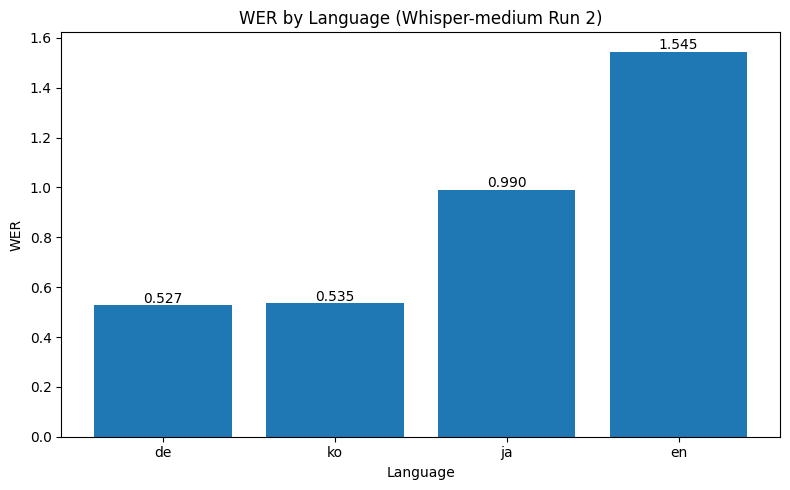

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-medium Run 2)")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_medium_run2.png")
plt.show()

📊 WER 결과 (낮을수록 정확)
- DE : 0.5984 -> 0.5269 (좋아짐)
- KO : 0.6093 -> 0.5352 (좋아짐)
- EN : 0.9600 -> 1.5449 (나빠짐)
- JA : 4.7100 -> 0.9900 (좋아짐)